## Exploratory Data Analysis (EDA) & Feature Selection

This notebook focuses on understanding the processed dataset, identifying patterns, and making informed decisions about feature relevance using visualization and statistical methods. We will explore relationships between features and the target variable (`Churn`), and identify key insights to guide our machine learning model building.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots for better aesthetics
sns.set_style("whitegrid")

# Define your absolute data directory
data_dir = 'D:/My Data/Family Storages/Rudra/Education/Projects/Project 2 telco custimer churn/Data/'

# --- 1. Load the Prepared DataFrames ---

# Load the main DataFrame (df_encoded) for general use and correlation analysis
df = pd.read_csv(f'{data_dir}telco_churn_processed.csv')
print("DataFrame loaded for EDA (df_encoded):")
print(df.head())
print(df.info())

# Load the DataFrame *before* one-hot encoding, specifically for intuitive categorical EDA plots
df_for_categorical_eda = pd.read_csv(f'{data_dir}telco_churn_pre_encoding.csv')
print("\nDataFrame loaded for categorical EDA (df_pre_encoding):")
print(df_for_categorical_eda.head())
print(df_for_categorical_eda.info())

DataFrame loaded for EDA (df_encoded):
   gender_Male  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0            0              0        1           0       1             0   
1            1              0        0           0      34             1   
2            1              0        0           0       2             1   
3            1              0        0           0      45             0   
4            0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   Contract_One year  Contract_Two year  \
0              False  

### Understand the Target Variable Distribution

It's vital to see how many customers churned versus stayed. This also indicates if your dataset is imbalanced, which is important for later model evaluation and selection.


Churn Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64


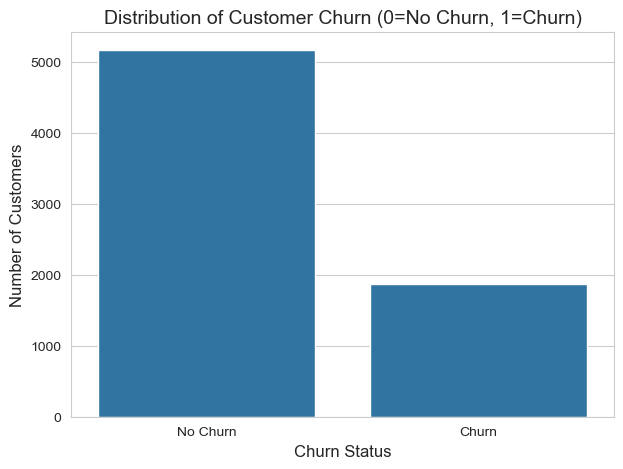


Churn Percentage: 26.54%
No Churn Percentage: 73.46%


In [13]:
# Count the occurrences of each churn status
churn_counts = df['Churn'].value_counts()
print("\nChurn Distribution:")
print(churn_counts)

# Visualize the distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn (0=No Churn, 1=Churn)', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'], fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('D:/My Data/Family Storages/Rudra/Education/Projects/Project 2 telco custimer churn/Visualization/Distribution_of_Customer_Churn.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate percentage
print(f"\nChurn Percentage: {churn_counts[1] / df.shape[0] * 100:.2f}%")
print(f"No Churn Percentage: {churn_counts[0] / df.shape[0] * 100:.2f}%")

### Explore Numerical Features vs. Churn

Visualize relationships between continuous numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) and the `Churn` target variable. This helps in identifying how these characteristics differ between churned and non-churned customers.

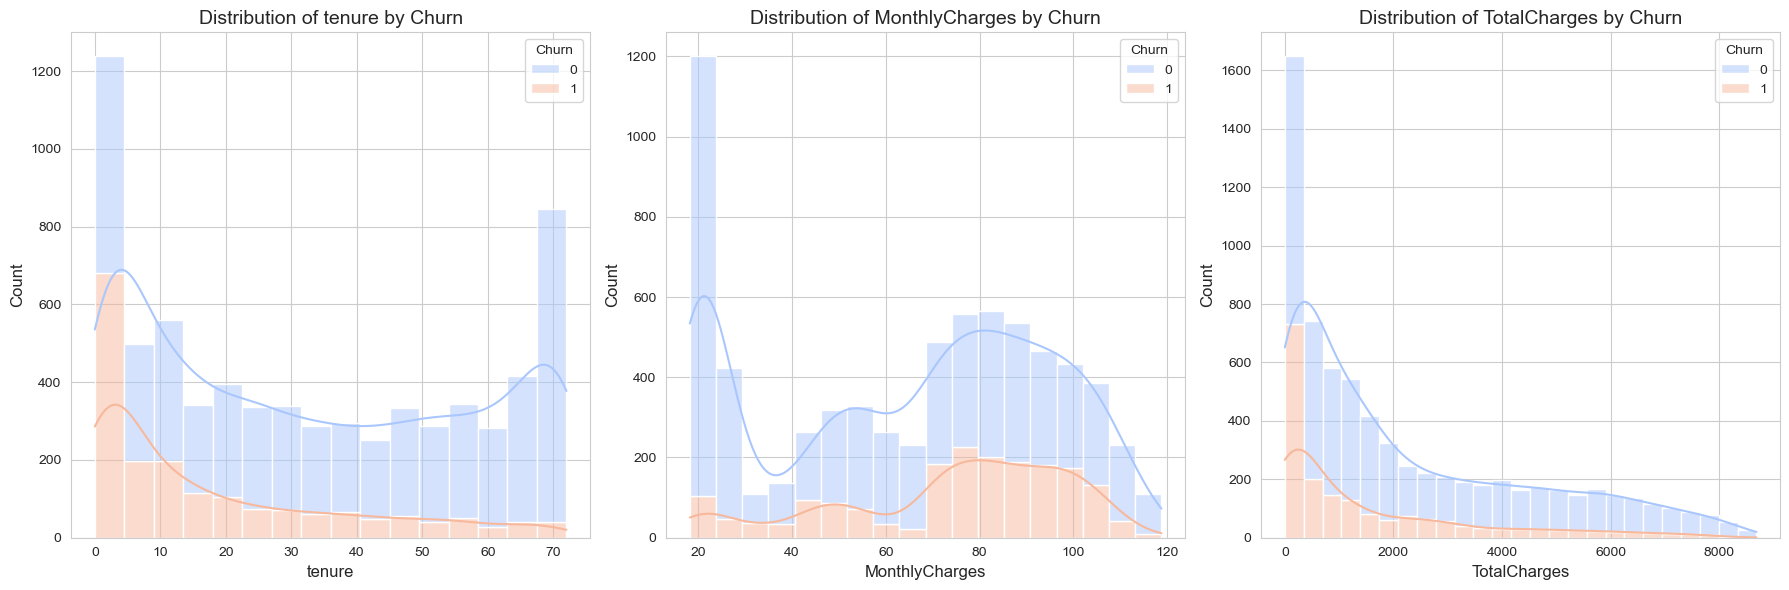

C:\Users\Rudra\AppData\Local\Temp\ipykernel_2796\2266293773.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
C:\Users\Rudra\AppData\Local\Temp\ipykernel_2796\2266293773.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
C:\Users\Rudra\AppData\Local\Temp\ipykernel_2796\2266293773.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


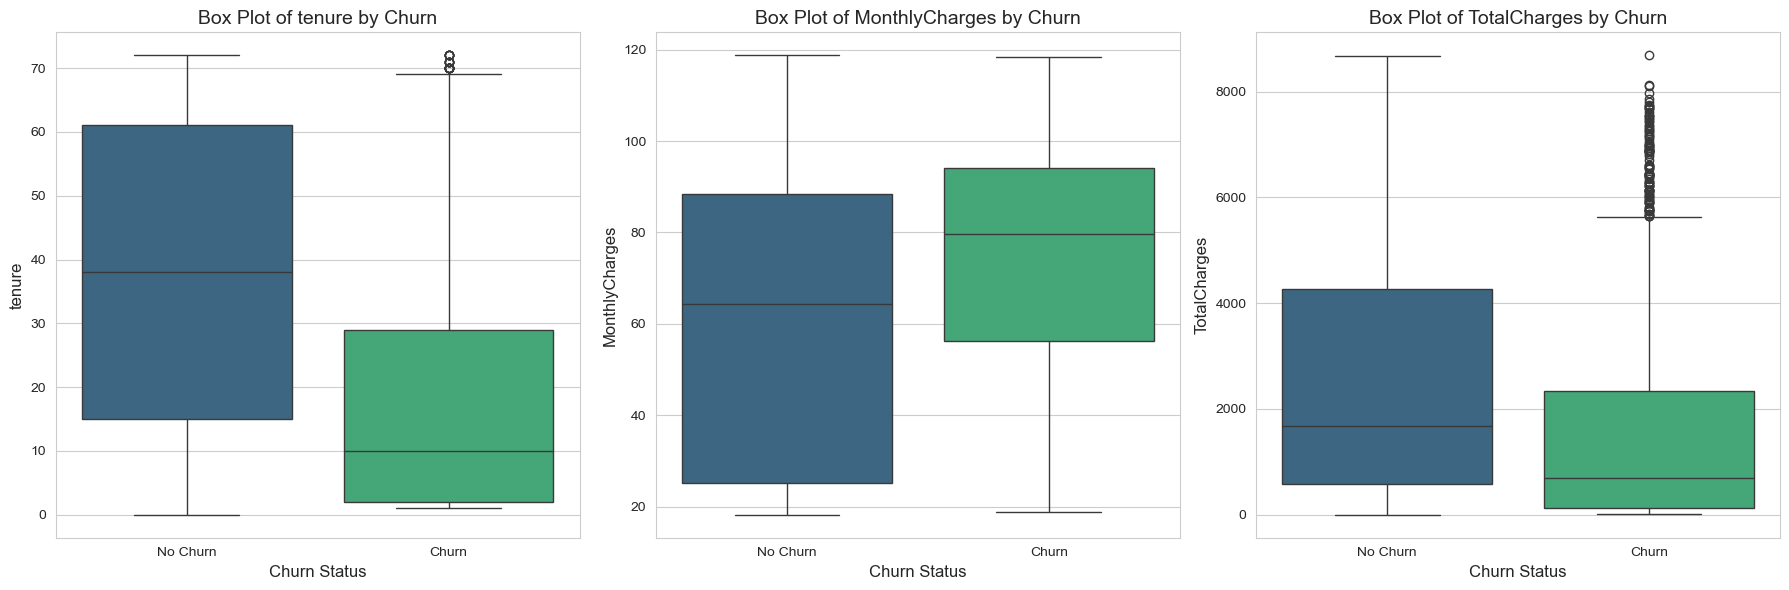

In [15]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple='stack', palette='coolwarm')
    plt.title(f'Distribution of {col} by Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('D:/My Data/Family Storages/Rudra/Education/Projects/Project 2 telco custimer churn/Visualization/Distribution_of_col_by_Churn.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'Box Plot of {col} by Churn', fontsize=14)
    plt.xlabel('Churn Status', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks([0, 1], ['No Churn', 'Churn'], fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('D:/My Data/Family Storages/Rudra/Education/Projects/Project 2 telco custimer churn/Visualization/Box_Plot_of_col_by_Churn.png', bbox_inches='tight', dpi=300)
plt.show()

### Explore Categorical Features vs. Churn

Visualize the proportion of churn for each category within your original categorical features. This provides intuitive insights into which customer segments or service preferences are more susceptible to churn.


--- Visualizing Original Categorical Features vs. Churn ---


ValueError: num must be an integer with 1 <= num <= 16, not 17

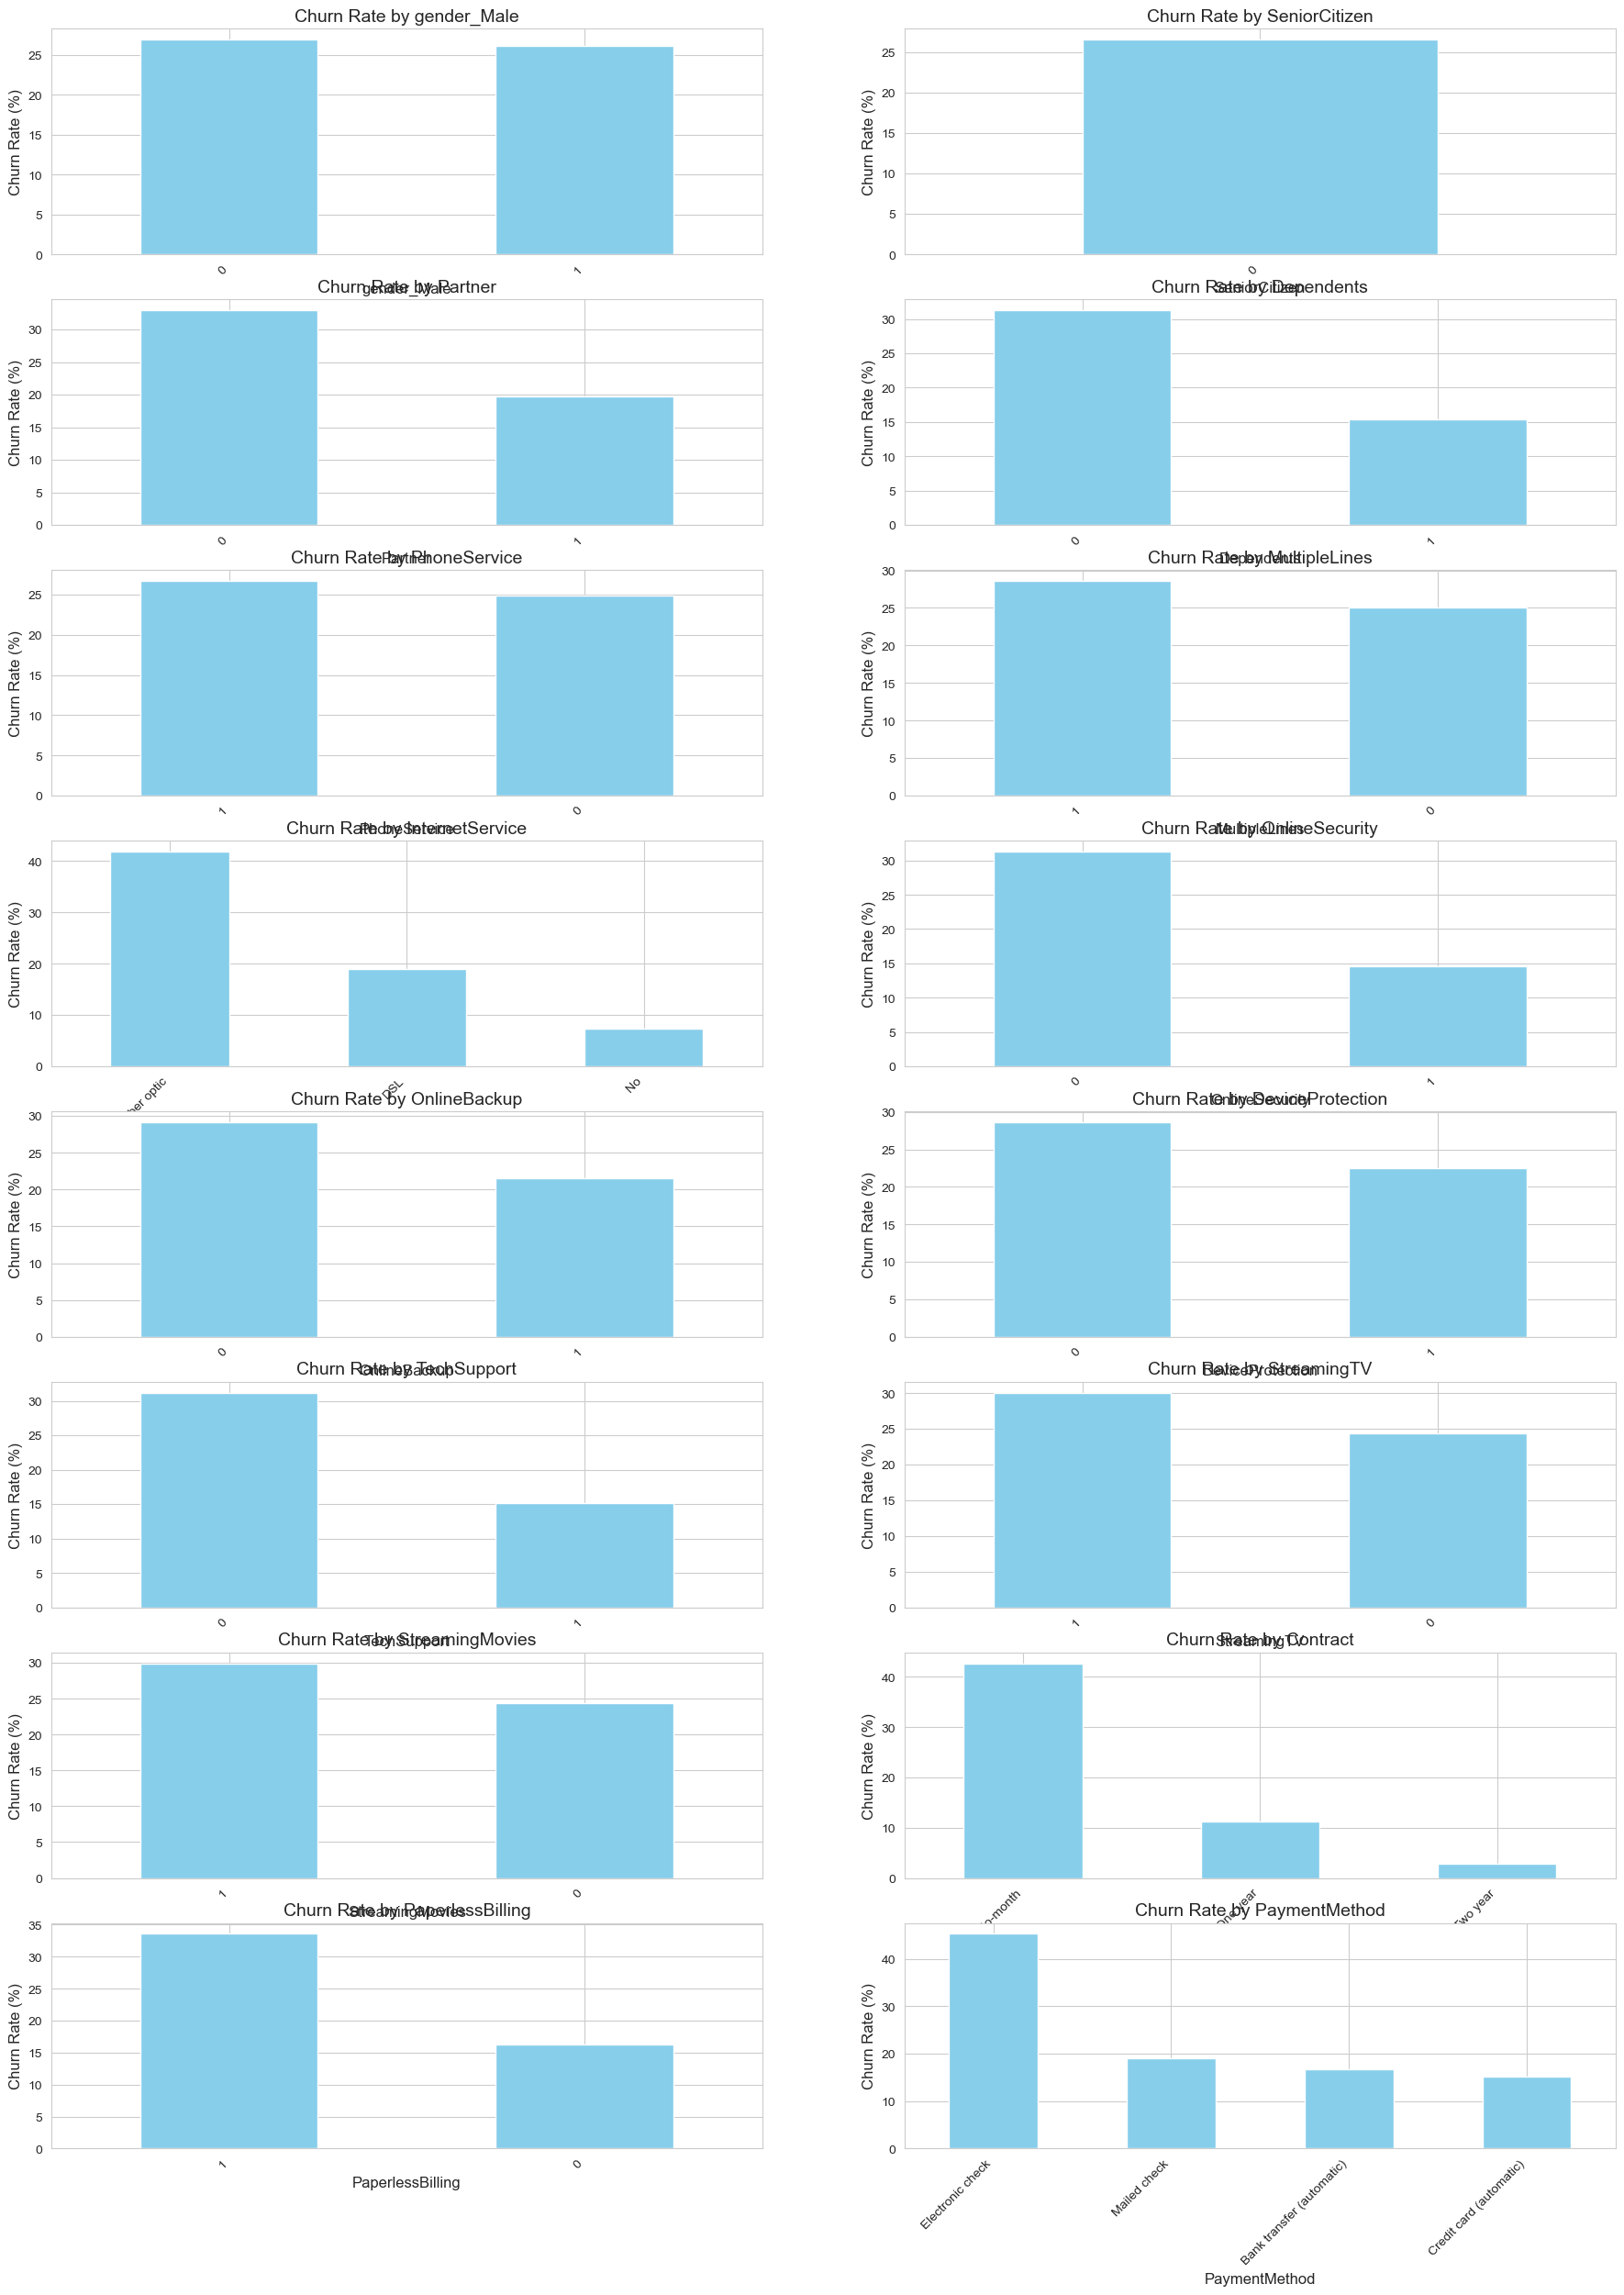

In [19]:
# List of original categorical features (excluding customerID and numericals already handled)
# This list should reflect the columns in df_for_categorical_eda that are still object/category dtypes.
# 'gender_Male' and 'SeniorCitizen' are already 0/1 from SQL step, so include them if you want to plot their churn rates.
original_categorical_features_for_plotting = [
    'gender_Male', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'TenureGroup'
]

print("\n--- Visualizing Original Categorical Features vs. Churn ---")
plt.figure(figsize=(22, 30)) # Adjusted figure size for more subplots
for i, col in enumerate(original_categorical_features_for_plotting):
    plt.subplot(8, 2, i + 1) # Adjust subplot grid (rows, columns) as needed, e.g., 8 rows, 2 columns
    
    # Calculate churn rate for each category
    # Ensure the column exists in df_for_categorical_eda before proceeding
    if col in df_for_categorical_eda.columns:
        churn_rate_by_category = df_for_categorical_eda.groupby(col)['Churn'].mean() * 100 # Convert to percentage
        churn_rate_by_category = churn_rate_by_category.sort_values(ascending=False) # Sort for better readability

        churn_rate_by_category.plot(kind='bar', color='skyblue')
        plt.title(f'Churn Rate by {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Churn Rate (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels for better fit
        plt.yticks(fontsize=10)
    else:
        print(f"Warning: Column '{col}' not found in df_for_categorical_eda. Skipping plot.")

plt.tight_layout()
plt.savefig('D:/My Data/Family Storages/Rudra/Education/Projects/Project 2 telco custimer churn/Visualization/Features_vs_Churn.png', bbox_inches='tight', dpi=300)
plt.show()

### Correlation Analysis

Understanding how features correlate with each other and, crucially, with the `Churn` target variable. This helps in identifying strong predictors and potential multicollinearity among independent variables.

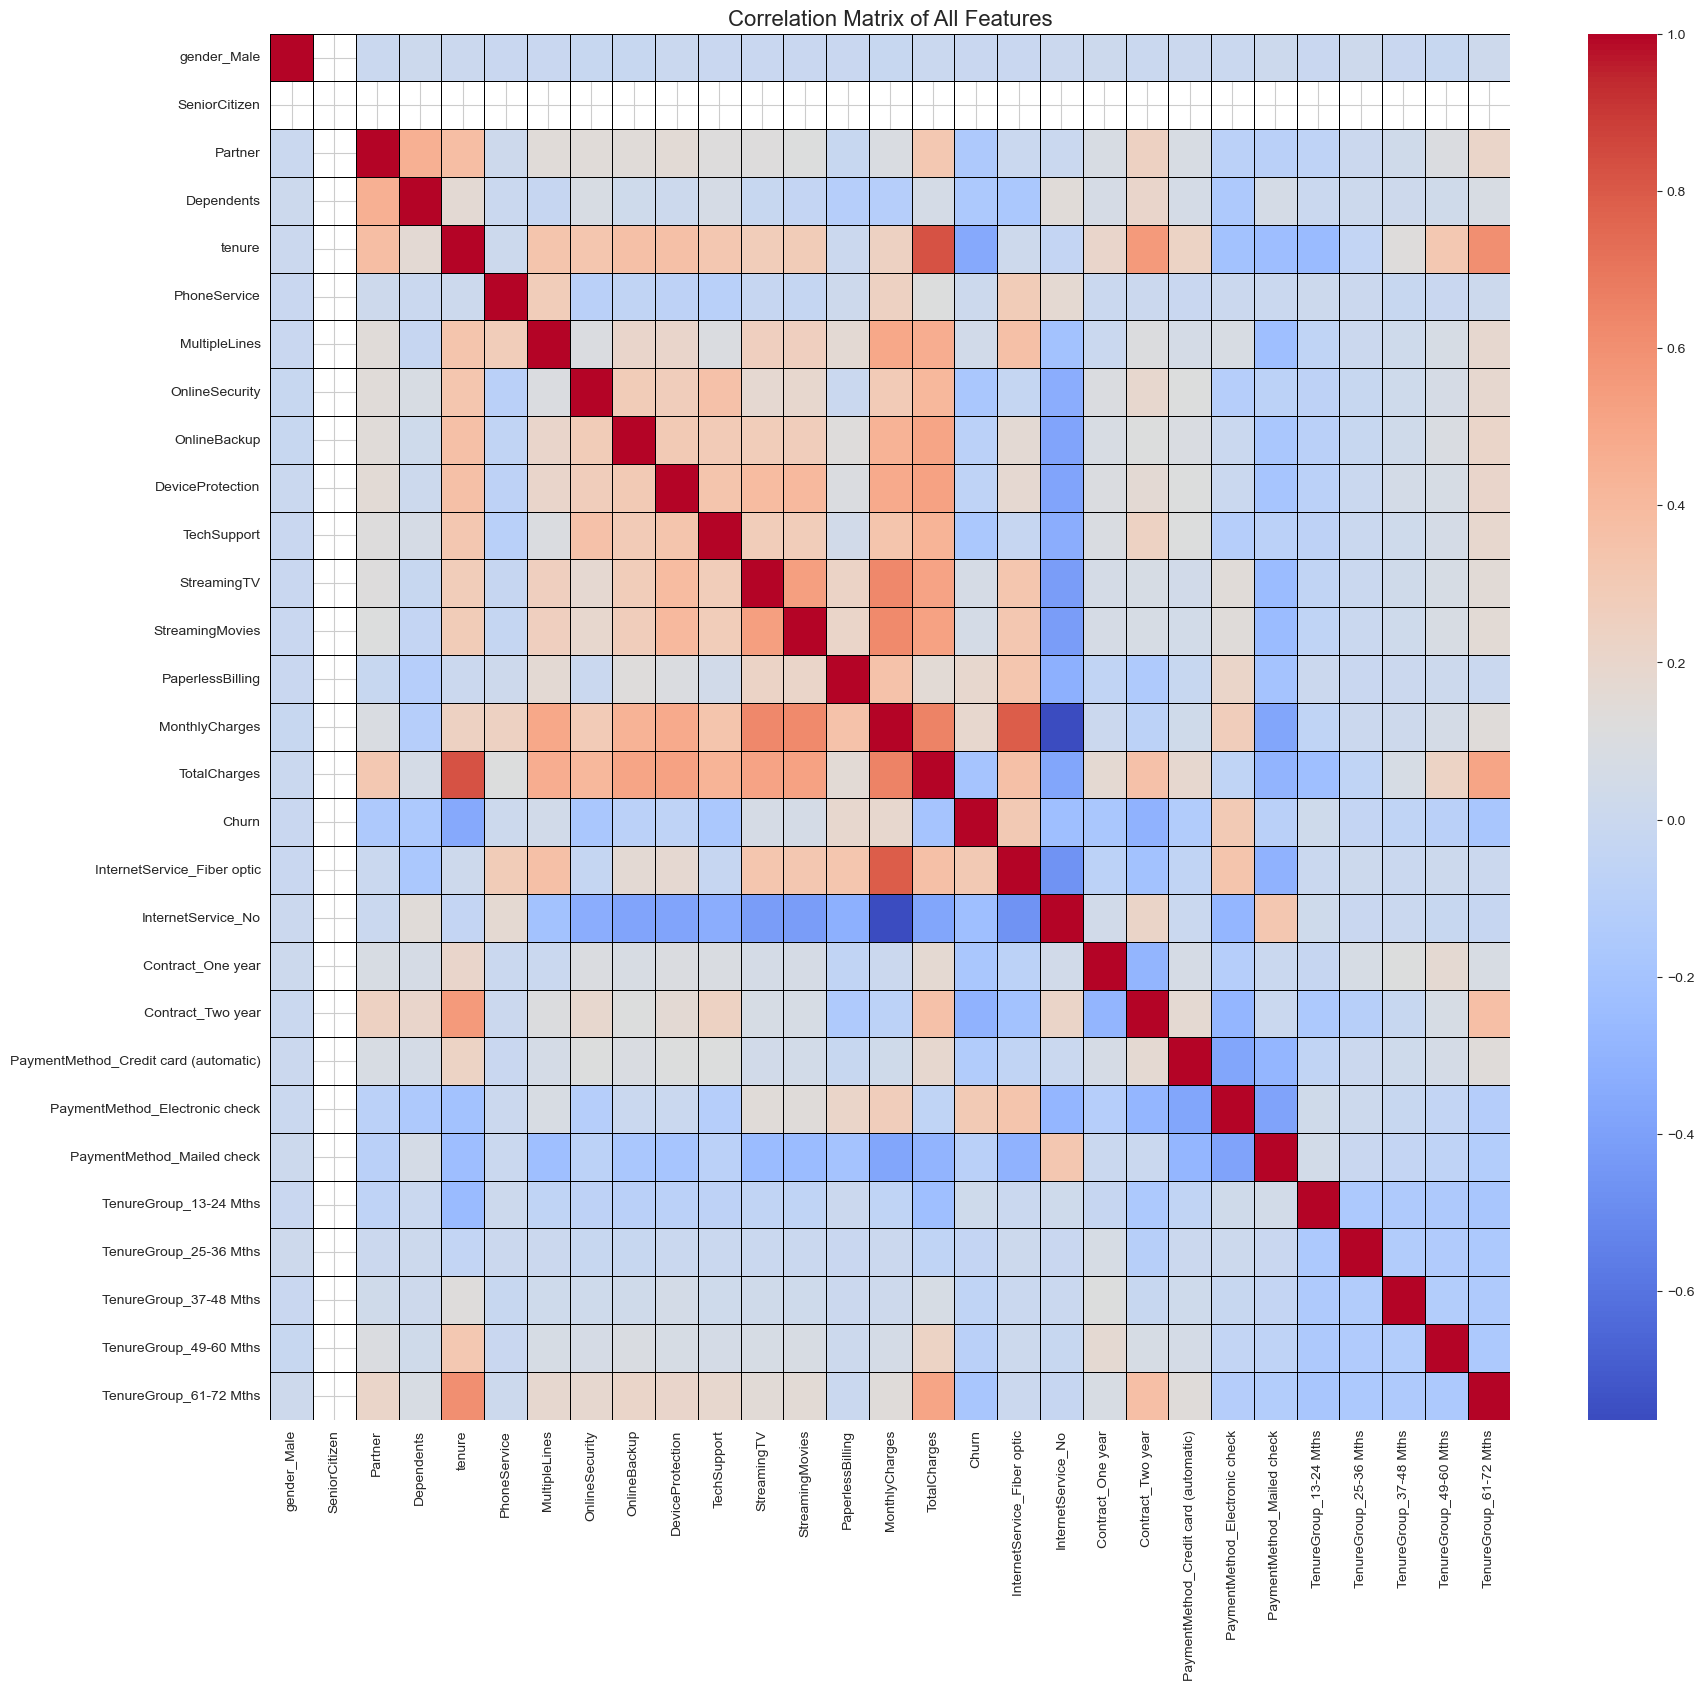


Feature Correlation with Churn (sorted):
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
TenureGroup_13-24 Mths                   0.028164
PhoneService                             0.011942
gender_Male                             -0.008612
TenureGroup_25-36 Mths                  -0.038455
TenureGroup_37-48 Mths                  -0.054793
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
TenureGroup_49-60 Mths                  -0.094850
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependen

In [21]:
# Calculate the correlation matrix using the one-hot encoded DataFrame
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 18)) # Adjusted figure size for a larger heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('D:/My Data/Family Storages/Rudra/Education/Projects/Project 2 telco custimer churn/Visualization/Correlation_Matrix_of_All_Features.png', bbox_inches='tight', dpi=300)
plt.show()

# Display correlations with the 'Churn' target specifically, sorted for easy analysis
print("\nFeature Correlation with Churn (sorted):")
print(correlation_matrix['Churn'].sort_values(ascending=False))

### Feature Selection Considerations

Based on the insights gained from the Exploratory Data Analysis (EDA), we can now make more informed decisions about which features to include in our machine learning model. This process helps simplify the model, reduce noise, and potentially improve performance and interpretability.

**Key Considerations from EDA:**

* **Relevance to Churn:** Features showing a clear positive or negative correlation with `Churn` (e.g., `Contract_Month-to-month`, `InternetService_Fiber optic`, `TechSupport_No`).
* **Distribution Differences:** Numerical features whose distributions significantly vary between churned and non-churned groups (e.g., lower `tenure` and higher `MonthlyCharges` for churners).
* **Multicollinearity:** Identify highly correlated independent variables (from the heatmap). While many ML models can handle some multicollinearity, highly correlated features can sometimes lead to less interpretable models or instability. For this project, we'll generally keep most features, but be aware of this.
* **Business Intuition:** Does the feature make logical sense from a business perspective as a driver of churn?

**Conclusion for Feature Selection:**

For the purpose of this project, we will use the `df` (which is the `df_encoded` DataFrame) containing all processed and one-hot encoded features. This comprehensive set allows the machine learning models to identify complex patterns. In more advanced scenarios, feature selection techniques (e.g., Recursive Feature Elimination, feature importance from tree-based models) could be applied to reduce dimensionality.